In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lectura del archivo de México sin valores nulos.

In [23]:
data = pd.read_csv("listings_Mexico_limpio.csv")
data

,Unnamed: 0,id,listing_url,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,https://www.airbnb.com/rooms/35797,153786,Dici,28/06/2010,"Mexico City, Mexico",a few days or more,0.0%,89.49061696116054%,...,4.829863,4.845981,4.725268,Sin licencia,f,1,1,0,0,1.741839
1,1,44616,https://www.airbnb.com/rooms/44616,196253,Fernando,09/08/2010,"Mexico City, Mexico",within an hour,100.0%,93.0%,...,4.780000,4.980000,4.480000,Sin licencia,f,8,4,1,0,0.410000
2,2,67703,https://www.airbnb.com/rooms/67703,334451,Nicholas,04/01/2011,"Mexico City, Mexico",within an hour,71.0%,57.0%,...,4.920000,4.980000,4.910000,Sin licencia,f,2,2,0,0,0.310000
3,3,70644,https://www.airbnb.com/rooms/70644,212109,Trisha,24/08/2010,"Mexico City, Mexico",within a few hours,100.0%,100.0%,...,4.980000,4.960000,4.920000,Sin licencia,f,3,2,1,0,0.830000
4,4,107078,https://www.airbnb.com/rooms/107078,540705,Andrea,27/04/2011,"Mexico City, Mexico",within an hour,100.0%,100.0%,...,4.730000,4.910000,4.820000,Sin licencia,f,3,3,0,0,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,https://www.airbnb.com/rooms/1252141718111439700,67472234,HostPal,16/04/2016,"Mexico City, Mexico",within an hour,100.0%,100.0%,...,4.829863,4.845981,4.725268,Sin licencia,t,37,14,23,0,1.741839
26578,26578,1252159821531694005,https://www.airbnb.com/rooms/1252159821531694005,596009321,Luis Angel,13/08/2024,"Mexico City, Mexico",within an hour,100.0%,100.0%,...,4.829863,4.845981,4.725268,Sin licencia,t,16,8,8,0,1.741839
26579,26579,1252185591721328995,https://www.airbnb.com/rooms/1252185591721328995,596009321,Luis Angel,13/08/2024,"Mexico City, Mexico",within an hour,100.0%,100.0%,...,4.829863,4.845981,4.725268,Sin licencia,t,16,8,8,0,1.741839
26580,26580,1252218347521498445,https://www.airbnb.com/rooms/1252218347521498445,596009321,Luis Angel,13/08/2024,"Mexico City, Mexico",within an hour,100.0%,100.0%,...,4.829863,4.845981,4.725268,Sin licencia,t,16,8,8,0,1.741839


Mostramos la información de las variables


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   id                                            26582 non-null  int64  
 2   listing_url                                   26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_location                                 26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_response_rate                            26582 non-null  object 
 9   host_acceptance_rate                          26582 non-null 

Tranformación de "price" , "host_response_rate" y "host_acceptance_rate" a tipo float

In [25]:
data["price"] = data["price"].replace('[\$,]', '', regex=True).astype(float)
data["host_response_rate"] = data["host_response_rate"].str.rstrip('%').astype(float)
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.rstrip('%').astype(float)



<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\yack_\AppData\Local\Temp\ipykernel_3412\814569546.py:1: SyntaxWarning: invalid escape sequence '\$'
  data["price"] = data["price"].replace('[\$,]', '', regex=True).astype(float)


Definimos variables cuantitativas y cualitativas

In [27]:
cualitativas = data.select_dtypes(include=['object'])
cuantitativas = data.select_dtypes(include=['int64', 'float64'])

Mostramos diagrama de caja

<Figure size 1500x800 with 0 Axes>

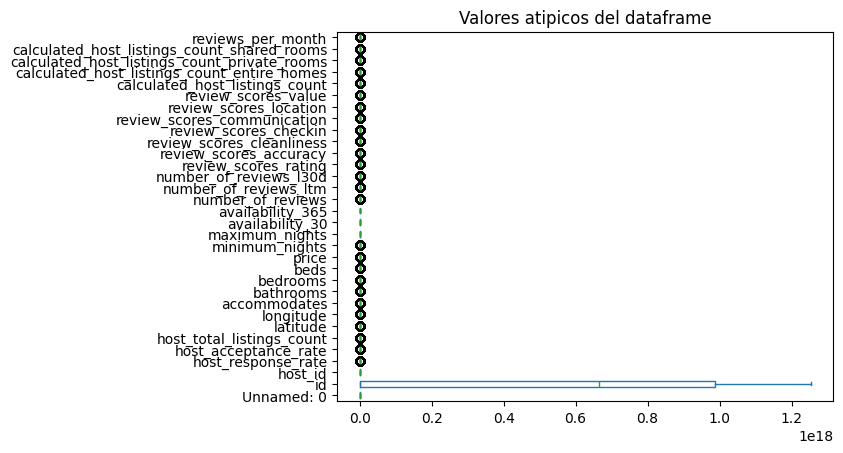

In [28]:
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind="box", vert=False)
plt.title("Valores atipicos del dataframe")
plt.show() 

Iniciamos con el método de desviación estandar

In [41]:
y=cuantitativas
Limites_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limites_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Unnamed: 0                                      3.631162e+04
id                                              1.997574e+18
host_id                                         7.675833e+08
host_response_rate                              1.497362e+02
host_acceptance_rate                            1.562047e+02
host_total_listings_count                       6.148874e+02
latitude                                        1.953289e+01
longitude                                      -9.906674e+01
accommodates                                    1.043010e+01
bathrooms                                       4.605316e+00
bedrooms                                        5.339414e+00
beds                                            6.956376e+00
price                                           1.578231e+04
minimum_nights                                  8.183006e+01
maximum_nights                                  1.793887e+03
availability_30                                 4.852387e+0

Obtenemos los datos

In [30]:
data3=cuantitativas[(y<=Limites_Superior)&(y>=Limite_Inferior)]
data3

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,NaN,89.490617,1.0,19.383820,NaN,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,1.0,1.0,0.0,0.0,1.741839
1,1,44616,196253,100.0,93.000000,13.0,19.411620,-99.177940,NaN,1.47486,...,4.700000,4.870000,4.780000,4.980000,4.480000,8.0,4.0,1.0,0.0,0.410000
2,2,67703,334451,71.0,57.000000,4.0,19.411520,-99.168570,4.0,1.00000,...,4.750000,4.940000,4.920000,4.980000,4.910000,2.0,2.0,0.0,0.0,0.310000
3,3,70644,212109,100.0,100.000000,4.0,19.356140,-99.163080,2.0,1.00000,...,4.960000,4.960000,4.980000,4.960000,4.920000,3.0,2.0,1.0,0.0,0.830000
4,4,107078,540705,100.0,100.000000,7.0,19.432110,-99.193270,2.0,1.50000,...,5.000000,5.000000,4.730000,4.910000,4.820000,3.0,3.0,0.0,0.0,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,100.0,100.000000,279.0,19.387329,-99.246731,4.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,37.0,14.0,23.0,0.0,1.741839
26578,26578,1252159821531694005,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,8.0,0.0,1.741839
26579,26579,1252185591721328995,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,8.0,0.0,1.741839
26580,26580,1252218347521498445,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,8.0,0.0,1.741839


Verificamos valores nulos

In [31]:
valores_nulos=data3.isnull().sum()
valores_nulos

Unnamed: 0                                         0
id                                                 0
host_id                                            0
host_response_rate                               990
host_acceptance_rate                            1103
host_total_listings_count                        380
latitude                                         357
longitude                                        712
accommodates                                     526
bathrooms                                        309
bedrooms                                         286
beds                                             466
price                                             94
minimum_nights                                   190
maximum_nights                                     1
availability_30                                    0
availability_365                                   0
number_of_reviews                                608
number_of_reviews_ltm                         

Reemplazamos valores atípicos

In [32]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,96.9,89.490617,1.0,19.383820,-99.200000,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,1.0,1.0,0.0,0.0,1.741839
1,1,44616,196253,100.0,93.000000,13.0,19.411620,-99.177940,3.1,1.47486,...,4.700000,4.870000,4.780000,4.980000,4.480000,8.0,4.0,1.0,0.0,0.410000
2,2,67703,334451,71.0,57.000000,4.0,19.411520,-99.168570,4.0,1.00000,...,4.750000,4.940000,4.920000,4.980000,4.910000,2.0,2.0,0.0,0.0,0.310000
3,3,70644,212109,100.0,100.000000,4.0,19.356140,-99.163080,2.0,1.00000,...,4.960000,4.960000,4.980000,4.960000,4.920000,3.0,2.0,1.0,0.0,0.830000
4,4,107078,540705,100.0,100.000000,7.0,19.432110,-99.193270,2.0,1.50000,...,5.000000,5.000000,4.730000,4.910000,4.820000,3.0,3.0,0.0,0.0,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,100.0,100.000000,279.0,19.387329,-99.246731,4.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,37.0,14.0,23.0,0.0,1.741839
26578,26578,1252159821531694005,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,8.0,0.0,1.741839
26579,26579,1252185591721328995,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,8.0,0.0,1.741839
26580,26580,1252218347521498445,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,8.0,0.0,1.741839


Corroboramos que no existan mas valores nulos

In [33]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Unnamed: 0                                      0
id                                              0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0


Diagrama de la limpieza de outliers

<Figure size 1500x800 with 0 Axes>

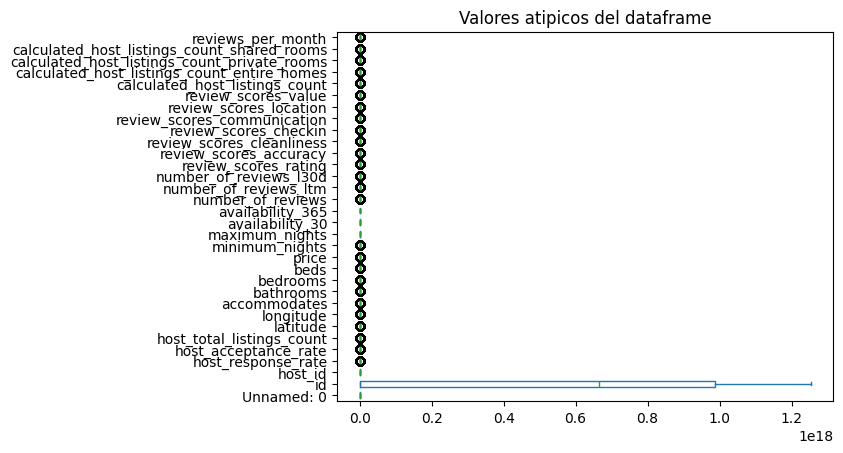

In [34]:
fig = plt.figure(figsize=(15, 8))
data_clean.plot(kind="box", vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

Este es procedimiento de cuartiles

In [35]:
y=cuantitativas

percentiles25=y.quantile(0.25) #Q1
percentiles75=y.quantile(0.75) #Q3
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Unnamed: 0                                      3.987150e+04
id                                              2.467577e+18
host_id                                         8.612864e+08
host_response_rate                              1.095747e+02
host_acceptance_rate                            1.157641e+02
host_total_listings_count                       3.950000e+01
latitude                                        1.949409e+01
longitude                                      -9.911773e+01
accommodates                                    7.000000e+00
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           2.713500e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
availability_30                                 6.350000e+0

Obtenemos los datos

In [36]:
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,NaN,89.490617,1.0,19.383820,NaN,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,1.0,1.0,0.0,0.0,1.741839
1,1,44616,196253,100.0,93.000000,13.0,19.411620,-99.177940,NaN,1.47486,...,4.700000,4.870000,4.780000,4.980000,4.480000,8.0,4.0,1.0,0.0,0.410000
2,2,67703,334451,NaN,NaN,4.0,19.411520,-99.168570,4.0,1.00000,...,4.750000,4.940000,4.920000,4.980000,4.910000,2.0,2.0,0.0,0.0,0.310000
3,3,70644,212109,100.0,100.000000,4.0,19.356140,-99.163080,2.0,1.00000,...,4.960000,4.960000,4.980000,4.960000,4.920000,3.0,2.0,1.0,0.0,0.830000
4,4,107078,540705,100.0,100.000000,7.0,19.432110,-99.193270,2.0,1.50000,...,5.000000,5.000000,4.730000,4.910000,4.820000,3.0,3.0,0.0,0.0,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,100.0,100.000000,NaN,19.387329,NaN,4.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,NaN,14.0,NaN,0.0,1.741839
26578,26578,1252159821531694005,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,NaN,0.0,1.741839
26579,26579,1252185591721328995,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,NaN,0.0,1.741839
26580,26580,1252218347521498445,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,NaN,0.0,1.741839


Verificamos valores nulos

In [37]:
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                         0
id                                                 0
host_id                                            0
host_response_rate                              2129
host_acceptance_rate                            2908
host_total_listings_count                       3764
latitude                                        1779
longitude                                       2845
accommodates                                    1352
bathrooms                                        644
bedrooms                                         858
beds                                            2447
price                                           2161
minimum_nights                                  3584
maximum_nights                                     0
availability_30                                    0
availability_365                                   0
number_of_reviews                               2328
number_of_reviews_ltm                         

Reemplazamos los valores atípicos

In [38]:
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,98.4,89.490617,1.0,19.383820,-99.200000,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,1.0,1.0,0.0,0.0,1.741839
1,1,44616,196253,100.0,93.000000,13.0,19.411620,-99.177940,2.9,1.47486,...,4.700000,4.870000,4.780000,4.980000,4.480000,8.0,4.0,1.0,0.0,0.410000
2,2,67703,334451,98.4,96.400000,4.0,19.411520,-99.168570,4.0,1.00000,...,4.750000,4.940000,4.920000,4.980000,4.910000,2.0,2.0,0.0,0.0,0.310000
3,3,70644,212109,100.0,100.000000,4.0,19.356140,-99.163080,2.0,1.00000,...,4.960000,4.960000,4.980000,4.960000,4.920000,3.0,2.0,1.0,0.0,0.830000
4,4,107078,540705,100.0,100.000000,7.0,19.432110,-99.193270,2.0,1.50000,...,5.000000,5.000000,4.730000,4.910000,4.820000,3.0,3.0,0.0,0.0,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,100.0,100.000000,7.3,19.387329,-99.200000,4.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,4.9,14.0,0.7,0.0,1.741839
26578,26578,1252159821531694005,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,0.7,0.0,1.741839
26579,26579,1252185591721328995,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,0.7,0.0,1.741839
26580,26580,1252218347521498445,596009321,100.0,100.000000,16.0,19.432687,-99.197736,2.0,1.00000,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,0.7,0.0,1.741839


Mostramos el diagrama

<Figure size 1500x800 with 0 Axes>

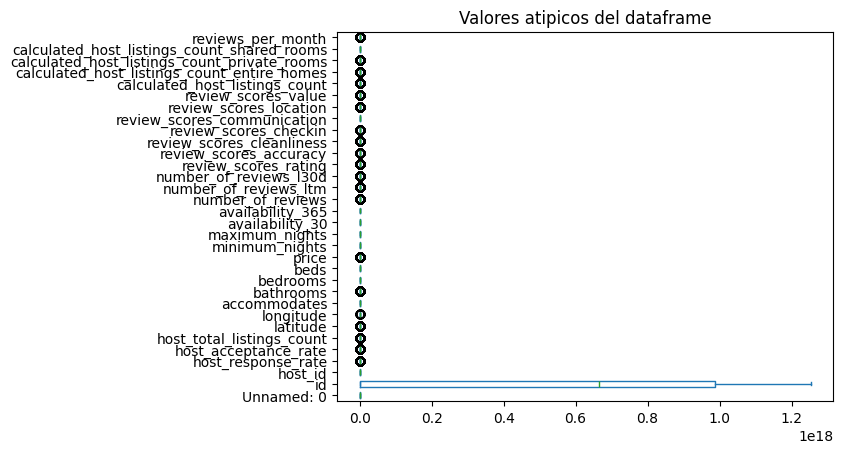

In [39]:
fig = plt.figure(figsize=(15, 8))
data4_iqr.plot(kind="box", vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

Unimos el dataframe de variables cualitativas limpias y cuantitativas

In [40]:
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,listing_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Dici,28/06/2010,"Mexico City, Mexico",a few days or more,f,"['email', 'phone', 'work_email']",t,t,Entire villa,...,4.761882,4.843371,4.829863,4.845981,4.725268,1.0,1.0,0.0,0.0,1.741839
1,https://www.airbnb.com/rooms/44616,Fernando,09/08/2010,"Mexico City, Mexico",within an hour,t,"['email', 'phone', 'work_email']",t,t,Entire home,...,4.700000,4.870000,4.780000,4.980000,4.480000,8.0,4.0,1.0,0.0,0.410000
2,https://www.airbnb.com/rooms/67703,Nicholas,04/01/2011,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Entire rental unit,...,4.750000,4.940000,4.920000,4.980000,4.910000,2.0,2.0,0.0,0.0,0.310000
3,https://www.airbnb.com/rooms/70644,Trisha,24/08/2010,"Mexico City, Mexico",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Entire rental unit,...,4.960000,4.960000,4.980000,4.960000,4.920000,3.0,2.0,1.0,0.0,0.830000
4,https://www.airbnb.com/rooms/107078,Andrea,27/04/2011,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Entire loft,...,5.000000,5.000000,4.730000,4.910000,4.820000,3.0,3.0,0.0,0.0,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,https://www.airbnb.com/rooms/1252141718111439700,HostPal,16/04/2016,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Private room in guesthouse,...,4.761882,4.843371,4.829863,4.845981,4.725268,4.9,14.0,0.7,0.0,1.741839
26578,https://www.airbnb.com/rooms/1252159821531694005,Luis Angel,13/08/2024,"Mexico City, Mexico",within an hour,f,"['email', 'phone']",t,t,Room in hotel,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,0.7,0.0,1.741839
26579,https://www.airbnb.com/rooms/1252185591721328995,Luis Angel,13/08/2024,"Mexico City, Mexico",within an hour,f,"['email', 'phone']",t,t,Room in hotel,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,0.7,0.0,1.741839
26580,https://www.airbnb.com/rooms/1252218347521498445,Luis Angel,13/08/2024,"Mexico City, Mexico",within an hour,f,"['email', 'phone']",t,t,Room in hotel,...,4.761882,4.843371,4.829863,4.845981,4.725268,16.0,8.0,0.7,0.0,1.741839


In [42]:
Datos_limpios.to_csv("Datos_limpios_mexico.csv")